In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.integrate import trapezoid, solve_ivp
import sympy

<p align="center">
  <img src="https://github.com/marcus-valmeida/Projeto-conversao/blob/vn/circuito_exercicio1.png?raw=true" alt="Circuito Exercício 1" width="500"/>
</p>

In [15]:
#Dados da questão
r   = 30*1e-2
N1  = 1000
U0  = 4*np.pi*1e-7
Lc  = 140*1e-2
Ac  = np.pi * (r**2)

num_pontos = 200

Massa = 10  # massa de 10Kg

#caso real
CampoMagnetico = np.array([0, 68, 135, 203, 271, 338, 406, 474, 542, 609, 1100, 1500, 2500, 4000, 5000, 9000, 12000, 20000, 25000])
DensidadeCampo = np.array([0, 0.733, 1.205, 1.424, 1.517, 1.560, 1.588, 1.617, 1.631, 1.646, 1.689, 1.703,1.724, 1.731, 1.738, 1.761, 1.770, 1.800, 1.816])

#caso linear
CampoMagnetico_linear = np.array([0, 68])
DensidadeCampo_linear = np.array([0, 0.733])

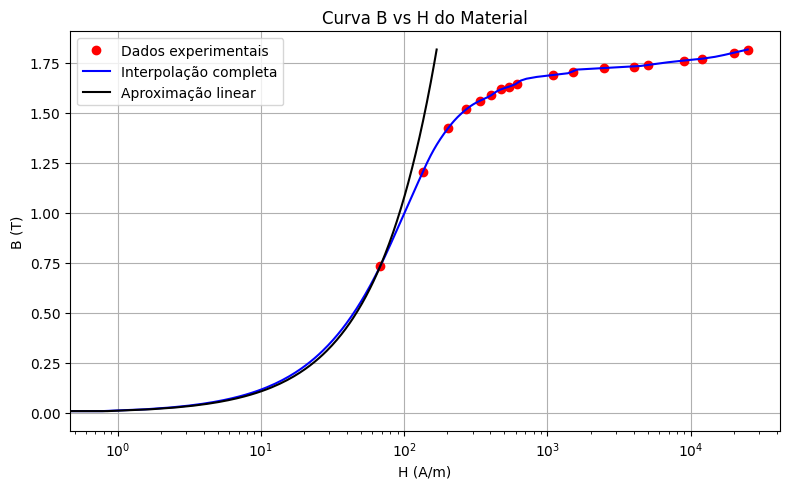

In [16]:
# Interpolação cúbica (ordem crescente de B)
f_real = CubicSpline(DensidadeCampo, CampoMagnetico, bc_type='natural')
f_linear = CubicSpline(DensidadeCampo_linear, CampoMagnetico_linear, bc_type='natural')

# Geração de pontos para interpolação
B_a = np.linspace(min(DensidadeCampo), max(DensidadeCampo), num_pontos)
H_a = f_real(B_a)
H_linear_a = f_linear(B_a)

# Plotagem
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(CampoMagnetico, DensidadeCampo, 'ro', label='Dados experimentais')
ax.plot(H_a, B_a, 'b-', label='Interpolação completa')
ax.plot(H_linear_a, B_a, 'k-', label='Aproximação linear')

ax.set_title('Curva B vs H do Material')
ax.set_xlabel('H (A/m)')
ax.set_ylabel('B (T)')
ax.set_xscale('log')
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()

#### Em todos os exercícios a seguir considere que o sistema é alimentado por uma fonte ideal de corrente constante.

- Determine X de modo que área útil para passagem de fluxo magnético nas paredes mais externas
seja a mesma que na coluna central.

- Considerando uma corrente aplicada na bobina de 1 A, apresente um gráfico para a força
magnética que surge no sistema em função do comprimento do entreferro nas condições a
seguir:

In [17]:
X = sympy.Symbol('X')
area1 = sympy.pi * (0.30)**2
area2 = sympy.pi * X**2 - sympy.pi * (X - 0.10)**2
equacao = sympy.Eq(area1, area2)

sympy.pprint(equacao)
print("-" * 30)
solucao = sympy.solve(equacao, X)
print(f"O valor de X é: {solucao[0]:.2f} m")

            2              2
0.09⋅π = π⋅X  - π⋅(X - 0.1) 
------------------------------
O valor de X é: 0.50 m


In [18]:
def Coenergia_forca(Interpolacao_H_B, corrente):
    # variação de g, no intreferro
    g = np.linspace(0.005, 0.05, num_pontos)# 5 mm em metros

    # variação de Bm
    Bm = np.linspace(0, float(np.max(DensidadeCampo)), num_pontos)
    # Corrente variavel para o fluxo com variação do entreferro -> Inicia um vetor com todos os valores nulos
    I_variavel = np.zeros(num_pontos)
    # Fluxo concatenado
    fluxo_concatenado = np.zeros(num_pontos)
    Coenergia = np.zeros(num_pontos)

    for j in range(len(g)):
      for b in range(len(Bm)):

        # If = (Hi*d + Bm*[x + g0]/U0) /Nf
        I_variavel[b] = ((Interpolacao_H_B(Bm[b])*Lc) + ((Bm[b]*(g[j])/U0)))/N1

        # λ =  Nf * Bm * Area_do_imã
        fluxo_concatenado[b] =  N1*Bm[b]*Ac

      # Interpolação de λ , Bm
      interpolacao_fluxo_concatenado_If = CubicSpline(I_variavel,fluxo_concatenado, bc_type='natural')

      #limite de integração do λ
      lim_int_fluxo_concatenado = np.linspace(0, corrente, num_pontos)
      #valores para coenergia
      interpol_fluxo_concatenado = interpolacao_fluxo_concatenado_If(lim_int_fluxo_concatenado)
      #valores para coenergia
      Coenergia[j] = trapezoid(interpol_fluxo_concatenado,lim_int_fluxo_concatenado)

    
    Forca = np.gradient(Coenergia, g)
    return Forca, Coenergia, g

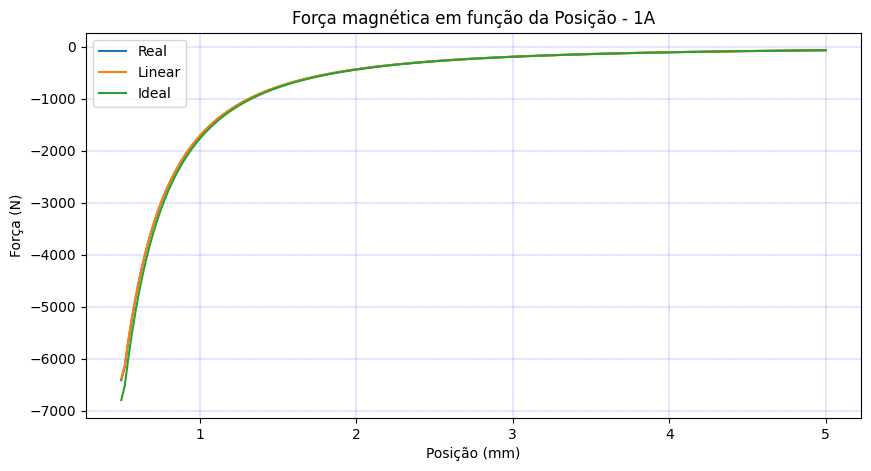

In [19]:
# ----- Cálculo -----
Forca_real, Co_energia_real, posicao        = Coenergia_forca(f_real, 1)
Forca_linear, Co_energia_linear, posicao    = Coenergia_forca(f_linear, 1)
Forca_ideal, Co_energia_ideal, posicao      = Coenergia_forca(lambda H: 0, 1)

# ----- Plot -----
plt.figure(figsize=[10,5])
plt.plot(posicao*100, Forca_real, label="Real")   
plt.plot(posicao*100, Forca_linear, label="Linear")
plt.plot(posicao*100, Forca_ideal, label="Ideal")
plt.xlabel("Posição (mm)")
plt.ylabel("Força (N)")
plt.title("Força magnética em função da Posição - 1A")
plt.legend()
plt.grid(True, which = 'both', linestyle = '--', linewidth = 0.2, color = 'blue')
plt.show()

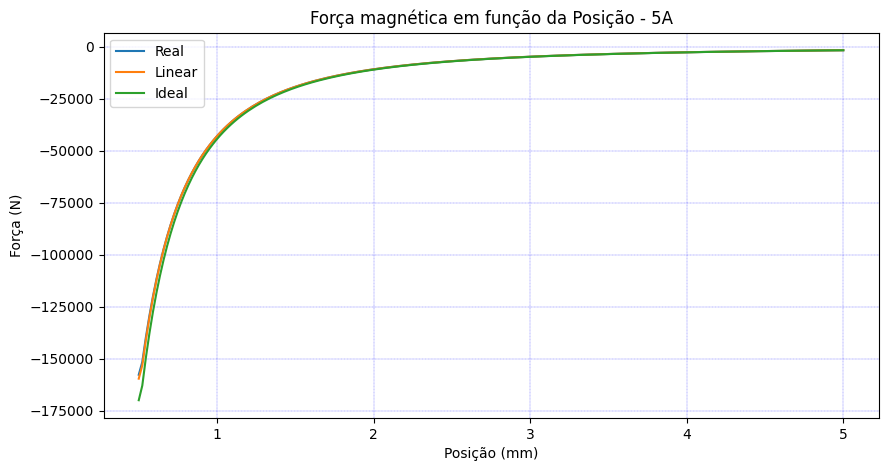

In [20]:
# ----- Cálculo -----
Forca_real, Co_energia_real, posicao        = Coenergia_forca(f_real, 5)
Forca_linear, Co_energia_linear, posicao    = Coenergia_forca(f_linear, 5)
Forca_ideal, Co_energia_ideal, posicao      = Coenergia_forca(lambda H: 0, 5)

# ----- Plot -----
plt.figure(figsize=[10,5])
plt.plot(posicao*100, Forca_real, label="Real")   
plt.plot(posicao*100, Forca_linear, label="Linear")
plt.plot(posicao*100, Forca_ideal, label="Ideal")
plt.xlabel("Posição (mm)")
plt.ylabel("Força (N)")
plt.title("Força magnética em função da Posição - 5A")
plt.legend()
plt.grid(True, which = 'both', linestyle = '--', linewidth = 0.2, color = 'blue')
plt.show()

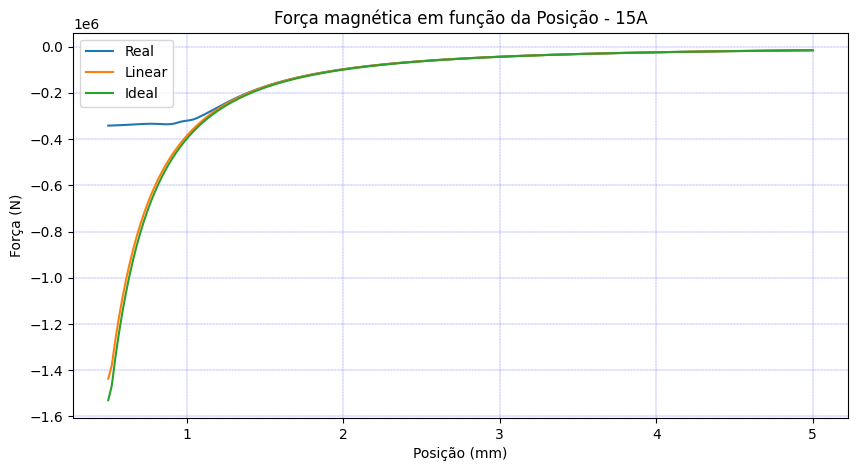

In [21]:
# ----- Cálculo -----
Forca_real, Co_energia_real, posicao        = Coenergia_forca(f_real, 15)
Forca_linear, Co_energia_linear, posicao    = Coenergia_forca(f_linear, 15)
Forca_ideal, Co_energia_ideal, posicao      = Coenergia_forca(lambda H: 0, 15)

# ----- Plot -----
plt.figure(figsize=[10,5])
plt.plot(posicao*100, Forca_real, label="Real")   
plt.plot(posicao*100, Forca_linear, label="Linear")
plt.plot(posicao*100, Forca_ideal, label="Ideal")
plt.xlabel("Posição (mm)")
plt.ylabel("Força (N)")
plt.title("Força magnética em função da Posição - 15A")
plt.legend()
plt.grid(True, which = 'both', linestyle = '--', linewidth = 0.2, color = 'blue')
plt.show()

- Considere que no instante inicial a placa móvel está parada e que temos uma distância entra a placa móvel o eletroímã de 5 cm. Considere ainda que, devido a rugosidade dos materiais, o espaçamento mínimo que pode haver entre os elementos do sistema é de 0,5 cm.

    - Considere que é aplicada uma corrente 80% do valor da maior corrente confiável. Apresente um gráfico da posição do elemento móvel em função do tempo.

In [22]:
# --- CONDIÇÕES INICIAIS ---
x_inicial = 0.05                                                # 5 cm
x_min = 0.005                                                   # 0.5 cm
v_inicial = 0.0
y0 = [x_inicial, v_inicial]

# --- PARÂMETROS DA SIMULAÇÃO ---
t_inicial = 0
t_final_estimado = 0.02
t_span = [t_inicial, t_final_estimado]

#temos uma corrente confiável quando usamos o Hmax e Bmax

# If = (Hmax*Lc + Bmax*g0/U0)/N1
g_min = 0.5*1e-2 
I_confiavel = ((np.max(CampoMagnetico) * Lc) + (np.max(DensidadeCampo) * g_min)/U0)/N1

print(f"A corrente confiável é : %.4f A" %I_confiavel)

# 80% da corrente confiável
I_confiavel_80 = 0.8*I_confiavel
print(f"A corrente confiável a ser usada é : %.4f A" %I_confiavel_80)

posicoes_vetor = np.linspace(0.005, 0.05, num_pontos) # Gerar pontos para interpolação da força

Forca_real, _, posicao = Coenergia_forca(f_real, I_confiavel_80)

forca_magnetica = CubicSpline(posicao, -np.abs(Forca_real))

A corrente confiável é : 42.2256 A
A corrente confiável a ser usada é : 33.7805 A


In [23]:
# Calcule a força na posição inicial (0.05 m)
forca_inicial = np.abs(forca_magnetica(0.05)) 

print(f"Força Magnética no início (5 cm): {forca_inicial:.2f} N")
print(f"Força Peso a ser vencida: 98.10 N")

if forca_inicial > 98.1:
    print(">>> O eletroímã é forte o suficiente para iniciar o movimento.")
else:
    print(">>> O eletroímã é MUITO FRACO para levantar a placa.")

Força Magnética no início (5 cm): 80912.81 N
Força Peso a ser vencida: 98.10 N
>>> O eletroímã é forte o suficiente para iniciar o movimento.


In [50]:
def equacao_movimento(t, y, massa, funcao_forca):
    
    posicao, velocidade = y
    
    # Força magnética (atrativa, para "cima", positiva)
    forca_magnetica_atual = np.abs(funcao_forca(posicao))
    
    # Força resultante é a força magnética menos a força peso
    forca_resultante = forca_magnetica_atual - (massa * 9.81)
    
    # Aceleração resultante
    aceleracao = forca_resultante / massa

    
    return [-velocidade, aceleracao]

In [52]:
def evento_parada(t, y, massa, funcao_forca):
    """
    Evento para parar a simulação quando a posição atinge o mínimo.
    """
    # y[0] é a posição. O evento ocorre quando esta função retorna 0.
    return y[0] - x_min

evento_parada.terminal = True  # Define que a simulação DEVE parar no evento.
evento_parada.direction = -1   # O evento só é válido quando a função está diminuindo (posição caindo para g_min).

Simulação concluída com sucesso. O tempo final foi 0.0028 segundos.


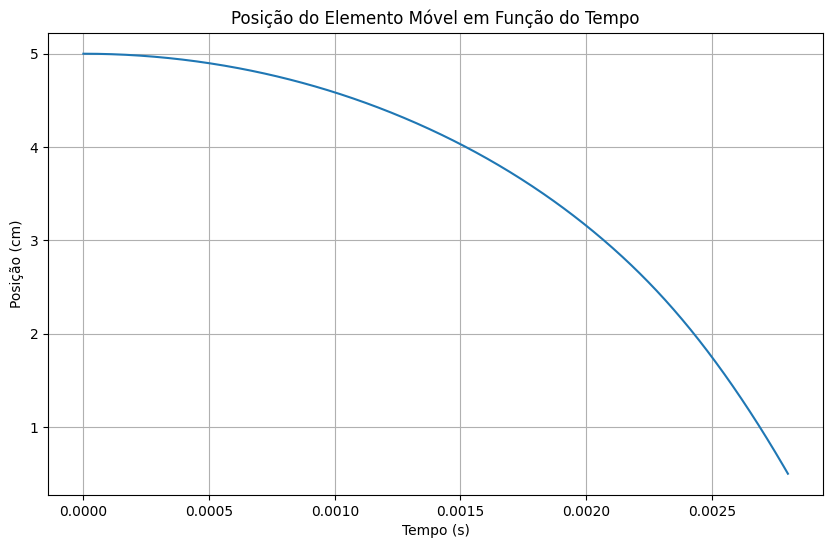

In [54]:
# --- RESOLVENDO A EDO COM A FUNÇÃO CORRIGIDA ---
solucao = solve_ivp(
    fun = equacao_movimento, 
    t_span = t_span,
    y0 = y0,
    method = "RK45", 
    dense_output = True,
    events = evento_parada,
    args = (Massa, forca_magnetica)
)

# --- EXTRAINDO E PLOTANDO OS RESULTADOS ---
if solucao.status == 1: # O status 1 significa que o evento terminal foi alcançado
    print(f"Simulação concluída com sucesso. O tempo final foi {solucao.t_events[0][0]:.4f} segundos.")
    
    # Para um gráfico suave, crie pontos de tempo usando o resultado denso
    t_plot = np.linspace(solucao.t[0], solucao.t[-1], 500)
    posicao_plot = solucao.sol(t_plot)[0] # sol.sol() é a função de interpolação do resultado
    
    plt.figure(figsize=(10, 6))
    plt.plot(t_plot, posicao_plot * 100) # Convertendo para cm para visualização
    plt.title("Posição do Elemento Móvel em Função do Tempo")
    plt.xlabel("Tempo (s)")
    plt.ylabel("Posição (cm)")
    plt.grid(True)
    plt.show()

elif solucao.status == 0:
    print("Simulação concluída porque o tempo final foi atingido, mas o evento de parada não ocorreu.")
else:
    print(f"A solução falhou com o status: {solucao.status}")